In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/Data Analysis Files')

Load the Dataset

In [19]:
# Load the dataset
file_path = 'imdb.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(df.head())

  Rank                                     Movie_name  Year Certificate  \
0    1                       The Shawshank Redemption  1994           R   
1    2                                  The Godfather  1972           R   
2    3                                The Dark Knight  2008       PG-13   
3    4  The Lord of the Rings: The Return of the King  2003       PG-13   
4    5                               Schindler's List  1993           R   

   Runtime_in_min                      Genre  Metascore Gross_in_$_M  \
0             142                      Drama       81.0        28.34   
1             175               Crime, Drama      100.0       134.97   
2             152       Action, Crime, Drama       84.0       534.86   
3             201   Action, Adventure, Drama       94.0       377.85   
4             195  Biography, Drama, History       94.0        96.90   

   Rating_from_10  
0             9.3  
1             9.2  
2             9.0  
3             9.0  
4             9.

In [20]:
print (df["Genre"].sample(5))

181             Drama, Western
128     Comedy, Drama, Romance
58      Comedy, Drama, Romance
884                      Drama
453    Crime, Drama, Film-Noir
Name: Genre, dtype: object


In [22]:
df['Genre'] = df['Genre'].str.split(',')  # Split multi-genre entries

Data Cleaning-Handle missing ratings

In [5]:
# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Rating_from_10', 'Genre'])

# Display the cleaned data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            1000 non-null   object 
 1   Movie_name      1000 non-null   object 
 2   Year            1000 non-null   object 
 3   Certificate     993 non-null    object 
 4   Runtime_in_min  1000 non-null   int64  
 5   Genre           1000 non-null   object 
 6   Metascore       840 non-null    float64
 7   Gross_in_$_M    841 non-null    object 
 8   Rating_from_10  1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB
None


Split multi-genre entries into individual rows

In [7]:
df['Genre'] = df['Genre'].str.split(', ')
df_exploded = df.explode('Genre')

Most Popular Genres Analysis

In [23]:
popular_genres = df.explode('Genre')['Genre'].value_counts()

# Display the most popular genres
print("Most Popular Genre:")
print(popular_genres.head(10))  # Show top 10 genres


Most Popular Genre:
Genre
 Drama        442
Drama         287
Action        183
Comedy        151
 Thriller     134
 Adventure    129
 Romance      125
Crime         111
 Crime         96
 Mystery       92
Name: count, dtype: int64


Average Ratings by Genre

In [25]:
# Calculate average ratings by genre
avg_ratings_by_genre = df.explode('Genre').groupby('Genre')['Rating_from_10'].mean().sort_values(ascending=False)

# Display average ratings by genre
print("Average Ratings by Genre:")
print(avg_ratings_by_genre)


Average Ratings by Genre:
Genre
Western       8.125000
Mystery       8.111111
 War          8.054000
Crime         8.034234
 Western      8.000000
Action        7.989071
 Drama        7.986878
 Sport        7.986667
Adventure     7.986154
 Film-Noir    7.985000
 Sci-Fi       7.979412
 Mystery      7.977174
 Biography    7.976190
 Adventure    7.974419
Biography     7.972414
Drama         7.969338
Film-Noir     7.950000
 Fantasy      7.946667
 Musical      7.943750
 Romance      7.942400
 Family       7.938462
 History      7.936170
 Comedy       7.934568
 Crime        7.934375
 Action       7.933333
Animation     7.926190
 Thriller     7.924627
Horror        7.915385
 Music        7.912121
Comedy        7.902649
 Horror       7.813043
Family        7.800000
Fantasy       7.750000
Thriller      7.700000
Name: Rating_from_10, dtype: float64


Visualization of Rating Trends Over Time

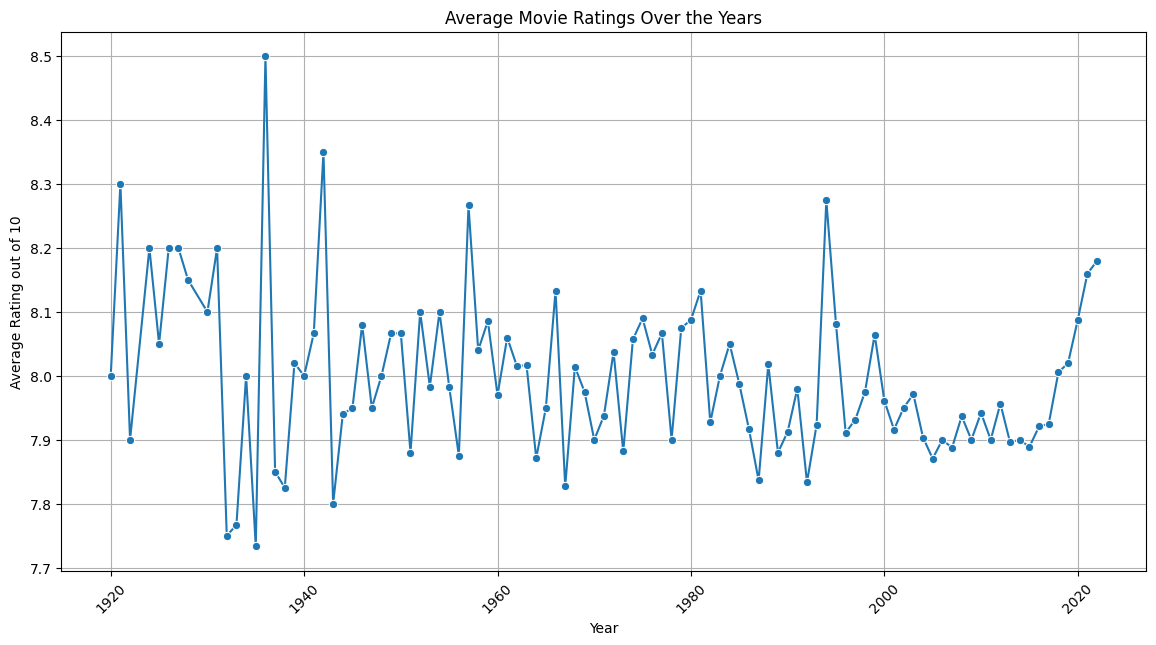

In [26]:
# Make sure Year is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert Year to numeric

# Group by year and calculate the average rating
yearly_avg_rating = df.groupby('Year')['Rating_from_10'].mean().dropna()  # Drop NaN values

# Plotting the trend
plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_avg_rating.index, y=yearly_avg_rating.values, marker='o')
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating out of 10')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Summary of Findings

In [27]:
print("Summary of Findings:")
print(f"Top 5 Most Popular Genres:\n{popular_genres.head()}")
print(f"Top 5 Average Ratings by Genre:\n{avg_ratings_by_genre.head()}")


Summary of Findings:
Top 5 Most Popular Genres:
Genre
 Drama       442
Drama        287
Action       183
Comedy       151
 Thriller    134
Name: count, dtype: int64
Top 5 Average Ratings by Genre:
Genre
Western     8.125000
Mystery     8.111111
 War        8.054000
Crime       8.034234
 Western    8.000000
Name: Rating_from_10, dtype: float64
